In [ ]:
## Fazer exploração, preparação, e treinamento de um modelo para classificar tipos de vidro,
## usando o dataset do link acima.

## Explore os dados, faça as limpezas que julgar pertinentes

## Depois Escolha um estimador adequado, faça busca de hiperparametros e crossvalidation
## Não se esqueça de utilizar tratamentos que julgue importantes

In [47]:
# Explorar ainda o fato do dataset ser desbalanceado e como melhorar

# rever métricas, deve ser pq é multi-label

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
glasses = pd.read_csv('glass.csv') 

In [3]:
glasses.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glasses.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
glasses.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
glasses['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [10]:
glasses.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [ ]:
## Depois Escolha um estimador adequado, faça busca de hiperparametros e crossvalidation
## Não se esqueça de utilizar tratamentos que julgue importantes

In [11]:
X = glasses.drop(columns=["Type"])
y = glasses["Type"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

#modelo básico para futura comparação
base_model = KNeighborsClassifier()
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)

# modelo robusto com uso de pipeline
steps_list = [("std_scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

pipe = Pipeline(steps=steps_list)
spliter = StratifiedKFold(n_splits = 10, shuffle=True, random_state=42)
param_grid = {
            "knn__weights":["uniform", "distance"],
            "knn__metric": ["manhattan", "euclidean","minkowski" ],
            "knn__n_neighbors": range(3, 20)
            }

grid_knn = GridSearchCV(
                        estimator = pipe,
                        param_grid=param_grid,
                        scoring = ["recall",'accuracy'],
                        cv = spliter,
                        refit = 'accuracy'
                        )

grid_knn.fit(X_train, y_train)

In [37]:
df_results_metric = pd.DataFrame(grid_knn.cv_results_)
df_results_metric.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_recall,split1_test_recall,...,split3_test_accuracy,split4_test_accuracy,split5_test_accuracy,split6_test_accuracy,split7_test_accuracy,split8_test_accuracy,split9_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.004190,0.001075,0.004886,0.002115,manhattan,3,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",NaN,NaN,...,0.470588,0.705882,0.764706,0.647059,0.588235,0.588235,0.647059,0.660458,0.087475,51
1,0.005784,0.001165,0.008279,0.005107,manhattan,3,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",NaN,NaN,...,0.529412,0.705882,0.823529,0.705882,0.647059,0.588235,0.647059,0.689542,0.084678,19


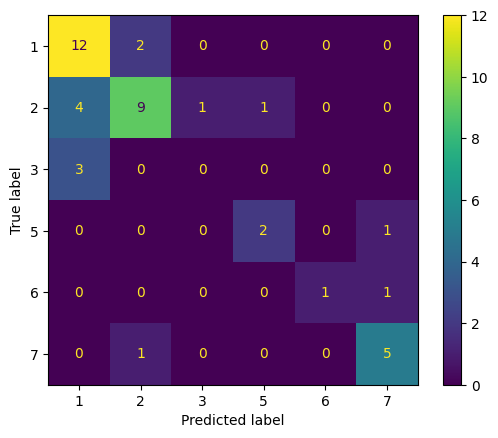

              precision    recall  f1-score   support

           1       0.63      0.86      0.73        14
           2       0.75      0.60      0.67        15
           3       0.00      0.00      0.00         3
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         2
           7       0.71      0.83      0.77         6

    accuracy                           0.67        43
   macro avg       0.63      0.58      0.58        43
weighted avg       0.66      0.67      0.65        43


# ====================



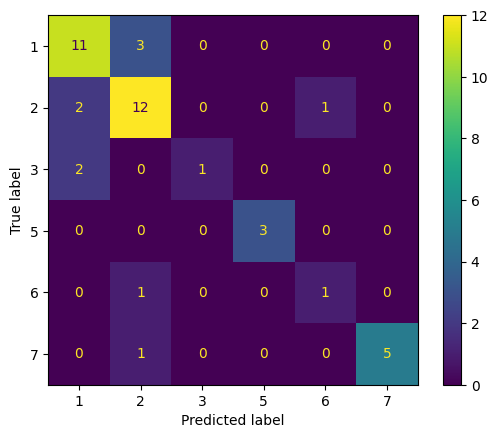

              precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.71      0.80      0.75        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       1.00      0.83      0.91         6

    accuracy                           0.77        43
   macro avg       0.82      0.71      0.74        43
weighted avg       0.79      0.77      0.76        43



In [46]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

cm = confusion_matrix(y_test, y_pred_base)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_base)
plt.show()

print(classification_report(y_test, y_pred_base))

print("\n# ====================\n")

y_pred_test = grid_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))
